# Task 1: 
Selecting a variant number

In [129]:
N = ord('V') % 10 + 1
print(N)

7


### My name is Veronika, so 7th variant has been selected. 

# Ісландія: Огляд країни

## **Загальна інформація**

### Географія
Ісландія — це острівна держава у північній частині Атлантичного океану.
**Площа**: *103,000 км²*  
**Населення**: *близько 370,000 осіб*

<div style="border: 2px solid black; padding: 10px; width: 50%;">
    <b>Столиця:</b> Рейк'явік<br>
    <b>Офіційна мова:</b> Ісландська<br>
    <b>Валюта:</b> Ісландська крона (ISK)<br>
    <b>Державний устрій:</b> Парламентська республіка
</div>

## **Культура та видатні пам'ятки**

**Культура Ісландії** насичена фольклором, музикою та літературою.  
Ось декілька відомих пам'яток культури та природи:

1. **Гейзери та вулкани**:
   - [Строккур](https://en.wikipedia.org/wiki/Strokkur) — відомий гейзер.
   - Гекла — активний вулкан.

2. **Ісландські саги**:
   - Твори середньовічної літератури, що описують історію Ісландії.

3. **Національний музей Ісландії**:
   - Розташований у столиці Рейк'явіку.

## **Відомі особистості**
- **Б'йорк** — всесвітньо відома співачка.
- **Хадльгрімур П'єтурссон** — поет та священик.
- **Сноррі Стурлусон** — історик та політик.

## **Таблиця статистики**

| Показник                | Значення      |
|-------------------------|---------------|
| Площа                   | 103,000 км²   |
| Населення               | 370,000 осіб  |
| Офіційна мова           | Ісландська    |
| Столиця                 | Рейк'явік     |

## **Природа Ісландії**

Ісландія має унікальні природні ландшафти, включаючи **льодовики**, **водоспади** та **геотермальні джерела**.  
Ось зображення одного з найвідоміших водоспадів Ісландії — Ґульфосс:

![Водоспад Ґульфосс](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/GullfossOverview.jpg/420px-GullfossOverview.jpg)


## **Додаткова інформація**
Більше про Ісландію можна прочитати на [офіційному сайті уряду Ісландії](https://www.government.is/).


## **Національний прапор Ісландії**

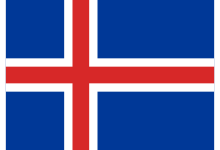

In [123]:
from IPython.display import SVG, display

iceland_flag_svg = '''
<svg xmlns="http://www.w3.org/2000/svg" width="220" height="150" viewBox="0 0 25 18">
  <rect width="25" height="18" fill="#003897"/>
  <rect y="7" width="25" height="4" fill="#fff"/>
  <rect x="7" width="4" height="18" fill="#fff"/>
  <rect y="8" width="25" height="2" fill="#d72828"/>
  <rect x="8" width="2" height="18" fill="#d72828"/>
</svg>
'''

display(SVG(iceland_flag_svg))


In [118]:
def decimal_to_binary(n):
    if n < 0:
        return '-' + decimal_to_binary(-n)
    integer_part = int(n)
    fractional_part = n - integer_part

    binary_integer = ''
    if integer_part == 0:
        binary_integer = '0000'
    else:
        while integer_part > 0:
            binary_integer = str(integer_part % 2) + binary_integer
            integer_part //= 2
            
    binary_integer = binary_integer.zfill(4)

    binary_fraction = ''
    while fractional_part and len(binary_fraction) < 10:  
        fractional_part *= 2
        bit = int(fractional_part)
        binary_fraction += str(bit)
        fractional_part -= bit

    return binary_integer + ('.' + binary_fraction if binary_fraction else '')

# Приклади використання
print(decimal_to_binary(8))       # 1000
print(decimal_to_binary(2))       # 0010
print(decimal_to_binary(0.625))   # 0000.101
print(decimal_to_binary(10.625))  # 0000.101


1000
0010
0000.101
1010.101
